In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

In [3]:
t <- readRDS('./t_cluster.rds')

In [4]:
t

An object of class Seurat 
24450 features across 36071 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Perform an integrated analysis

In [5]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(t) <- "integrated"

# Run the standard workflow for visualization and clustering
t <- ScaleData(t, verbose = FALSE)
t <- RunPCA(t, npcs = 30, verbose = FALSE)
t <- RunUMAP(t, reduction = "pca", dims = 1:27)
t <- FindNeighbors(t, reduction = "pca", dims = 1:27)
t <- FindClusters(t, resolution = 2)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:46:31 UMAP embedding parameters a = 0.9922 b = 1.112

14:46:31 Read 36071 rows and found 27 numeric columns

14:46:31 Using Annoy for neighbor search, n_neighbors = 30

14:46:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:46:35 Writing NN index file to temp file /tmp/RtmpTMxIWJ/file5521312967bb

14:46:35 Searching Annoy index using 1 thread, search_k = 3000

14:46:48 Annoy recall = 100%

14:46:48 Commencing smooth kNN distance calibration using 1 thread

14:46:50 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36071
Number of edges: 999794

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7418
Number of communities: 30
Elapsed time: 7 seconds


2 singletons identified. 28 final clusters.



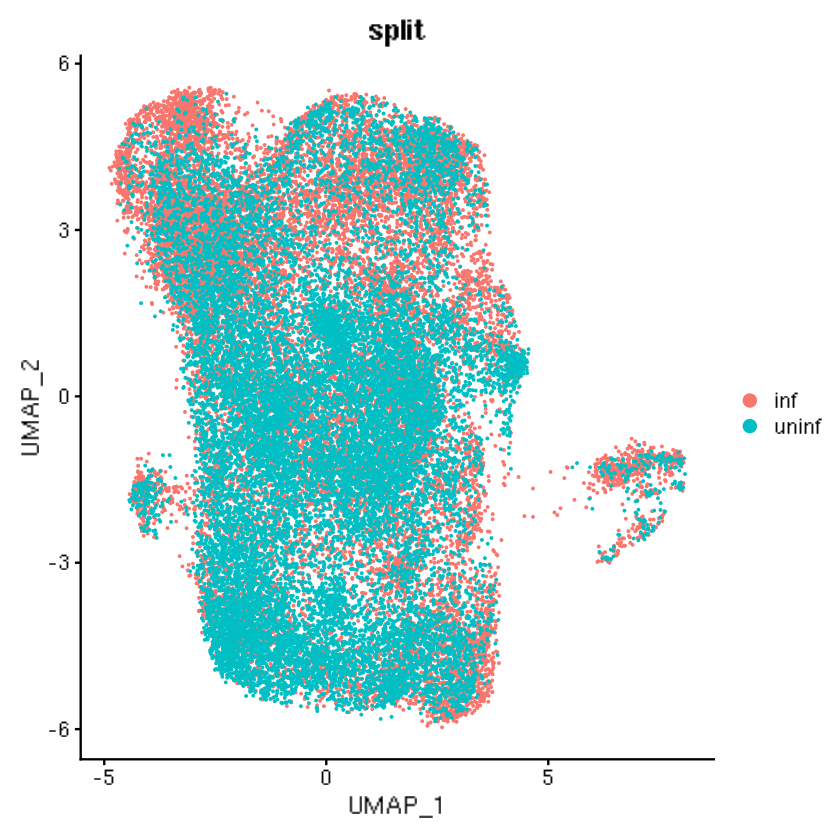

In [6]:
# Visualization
p1 <- DimPlot(t, reduction = "umap", group.by = "split")
p2 <- DimPlot(t, reduction = "umap", label = TRUE, repel = TRUE)
p1

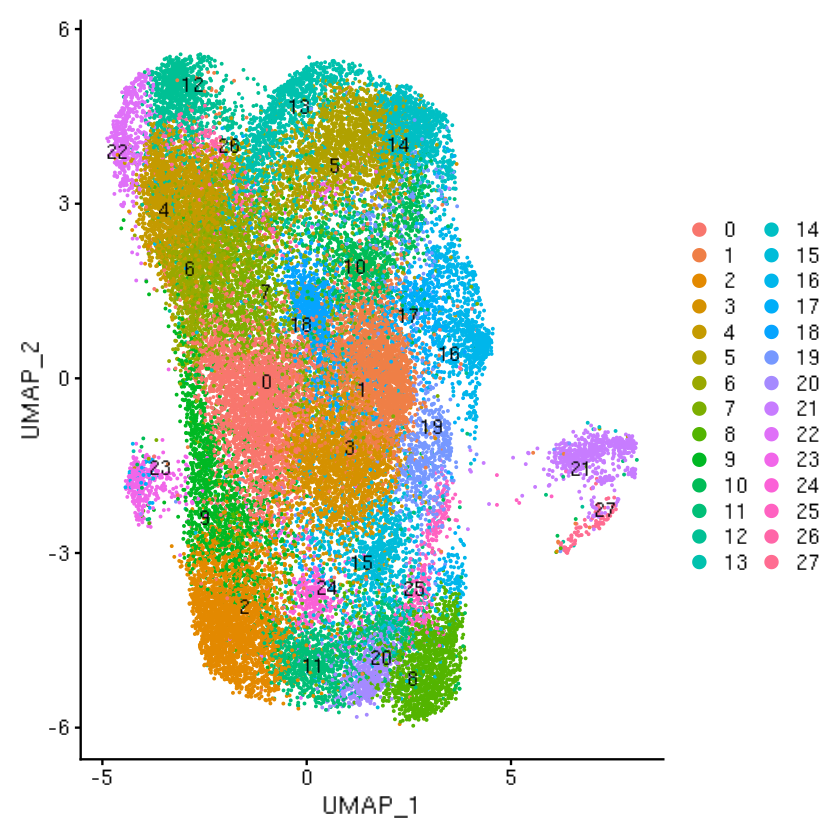

In [7]:
p2

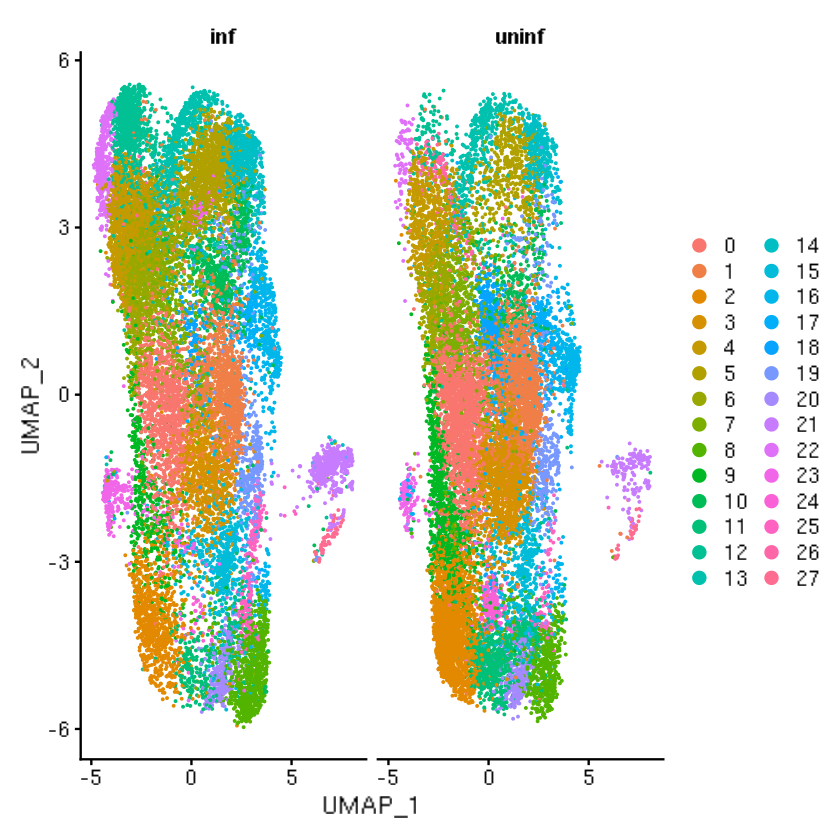

In [8]:
DimPlot(t, reduction = "umap", split.by = "split")

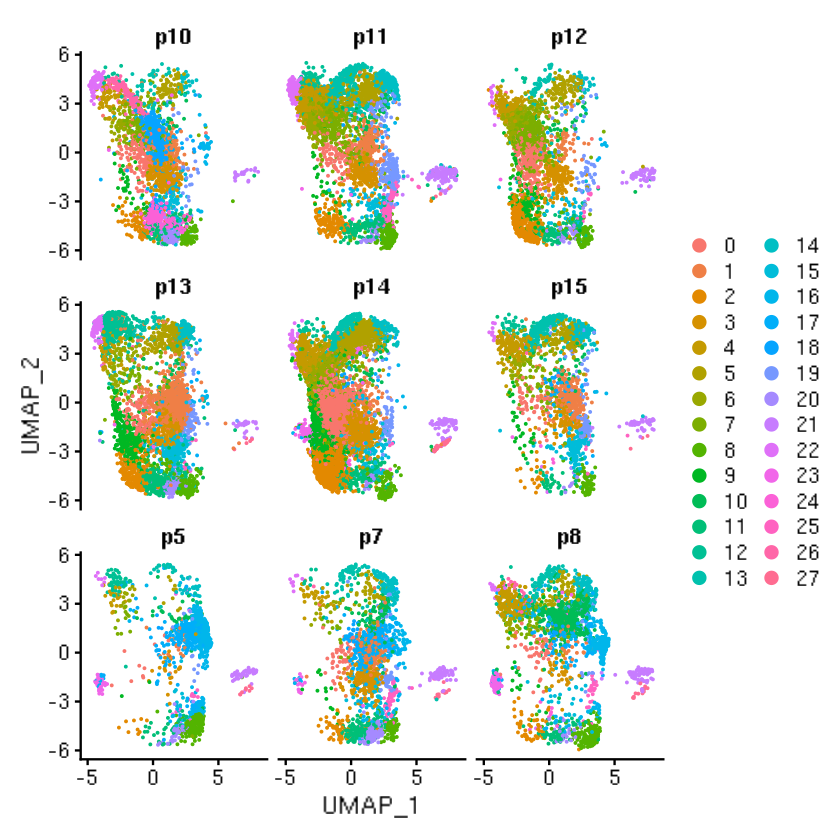

In [9]:
DimPlot(t, reduction = "umap", split.by = "patient", ncol = 3)

# Naming clusters with cell type markers

In [10]:
cycling <- c('STMN1', 'CLSPN', 'CKS1B', 'NUF2', 'ASPM', 'UBE2T', 'CENPF', 'RRM2', 'DTYMK', 'SGOL1', 'CENPE', 'MAD2L1', 
             'CCNA2', 'CENPU', 'CCNB1', 'DHFR', 'HMMR', 'MXD3', 'GMNN', 'CENPW', 'MCM7', 'EZH2', 'SMC2', 'CCDC34', 'CDCA5', 
             'H2AFX', 'ZWINT', 'CDK1', 'HELLS', 'MKI67', 'TMEM106C', 'CDKN3', 'NUSAP1', 'CCNB2', 'KIAA0101', 'PRC1', 'CENPN', 
             'CDT1', 'AURKB', 'TOP2A', 'TK1', 'BIRC5', 'TYMS', 'CDC25B', 'PCNA', 'TPX2', 'UBE2C', 'ASF1B', 'GTSE1') 
immunoregulation <- c('TNFRSF18', 'TNFRSF4', 'TNFRSF9', 'TNFRSF1B', 'AC133644.2', 'CTLA4', 'TIGIT', 'ICA1', 'RHBDD2', 
                      'MAGEH1', 'IL2RA', 'TBC1D4', 'BATF', 'IKZF2', 'FOXP3')
naive_CM <- c('SELL', 'LEF1', 'SOX4', 'SC5D', 'CCR7', 'TOB1', 'NOSIP')
CD8_cytotoxic <- c('CD8A', 'CD8B', 'DHRS3', 'GZMA', 'GFOD1', 'IFITM3', 'PRF1', 'KLRD1', 'GZMB', 'CCL5', 'NKG7', 'FGR', 
                   'CD160', 'FCER1G', 'XCL2', 'XCL1', 'GNLY', 'EOMES', 'CMC1', 'DTHD1', 'AOAH', 'CLIC3', 'CTSW', 'KLRF1', 
                   'KLRC2', 'KLRC1', 'PTGDR', 'MCTP2', 'CCL3', 'CCL4', 'CCL3L3', 'CCL4L2', 'MATK', 'MAPK1', 'IL2RB')
resident <- c('JUN', 'KLF6', 'FOSB', 'PTGER2', 'FOS', 'SYTL3', 'SPRY1', 'ANKRD28', 'GPR171', 'PDE4D', 'JAML', 'IL7R', 
              'GLIPR1', 'CD69', 'NFKBIA', 'PPP1R15A', 'NFKBIZ', 'TNFAIP3', 'PTGER4', 'ANXA1', 'ID2', 'ATF3', 'MGAT4A', 
              'AC092580.4', 'KLRB1', 'RORA', 'IL18R1', 'STAT4', 'IFNGR1', 'PFKFB3', 'GPR65')

In [ ]:
for (i in cycling) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in immunoregulation) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in naive_CM) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in CD8_cytotoxic) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in resident) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [11]:
Treg <- c('IL10')
type1 <- c('TNF', 'IFNG')
type3 <- c('IL22', 'IL17A')
TFH <- c('CXCL13')
T <- c('XCL1','XCL2')

In [ ]:
for (i in Treg) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in type1) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in type3) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in TFH) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in T) {
    print(FeaturePlot(t, features = i, min.cutoff = "q9"))
}

## Representative markers of each cluster

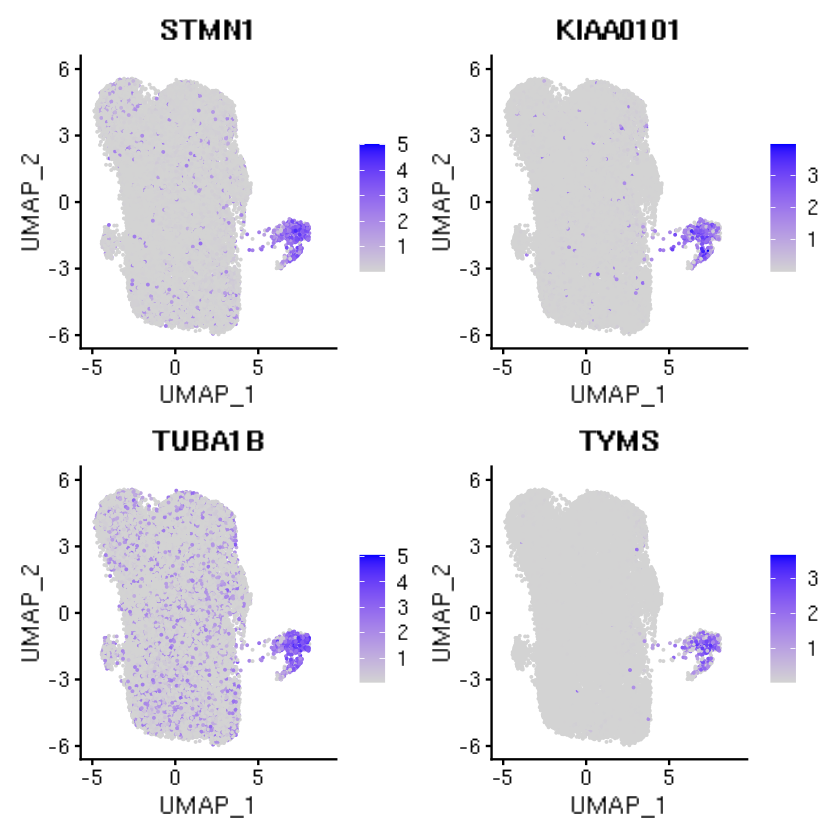

In [12]:
#T cell
FeaturePlot(t, features = c('STMN1', 'KIAA0101', 'TUBA1B', 'TYMS'), min.cutoff = "q9")

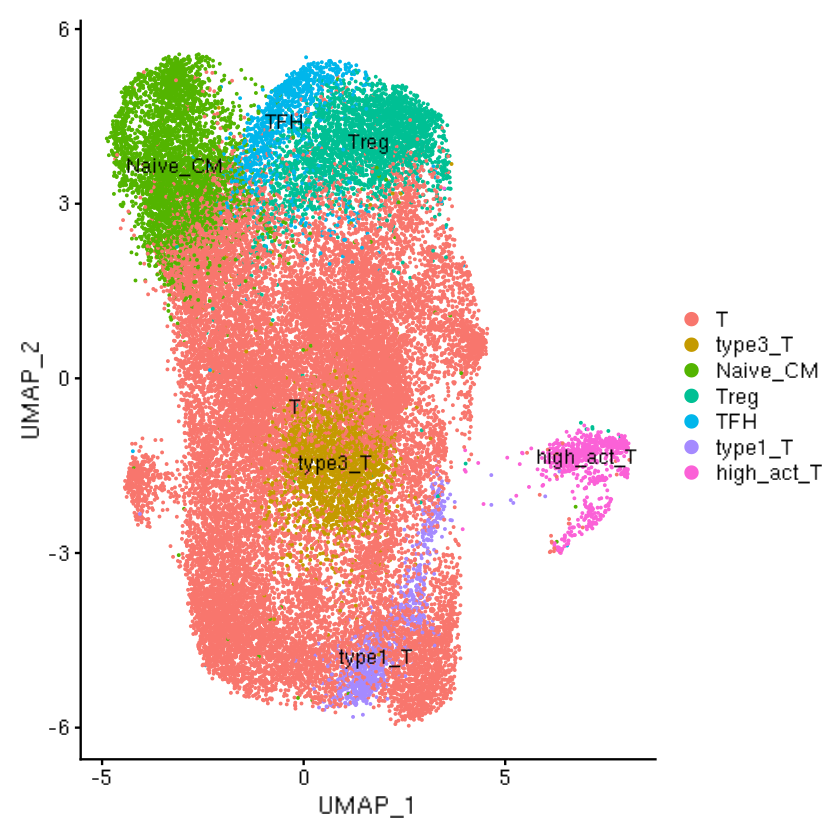

In [13]:
t <- RenameIdents(t, 
                 `0` = "T", `1` = "T", `2` = "T", `3` = "type3_T", `4` = "Naive_CM", `5` = "Treg", `6` = "T", `7` = "T",
                 `8` = "T", `9` = "T", `10` = "T", `11` = "T", `12` = "Naive_CM", `13` = "TFH", `14` = "Treg", `15` = "T",
                 `16` = "T", `17` = "T", `18` = "T", `19` = "T", `20` = "type1_T", `21` = "high_act_T", `22` = "Naive_CM", 
                  `23` = "T", `24` = "T", `25` = "type1_T", `26` = "Naive_CM", `27` = "high_act_T")
DimPlot(t, label = TRUE)

# Comparison of distributions of clusters

In [14]:
t$celltype <- Idents(t)
head(t@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ep,percent.he,split,patient,integrated_snn_res.1.1,seurat_clusters,celltype,integrated_snn_res.2
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
inf_GSE134809_69_AAACATACACACCA-1,GSE134809_69,1233,500,1.216545,0,0.08110300,inf,p5,2,17,T,17
inf_GSE134809_69_AAACGCTGCTACCC-1,GSE134809_69,1329,626,1.053424,0,0.00000000,inf,p5,12,16,T,16
inf_GSE134809_69_AAACGCTGCTCATT-1,GSE134809_69,896,358,1.450893,0,0.00000000,inf,p5,4,17,T,17
inf_GSE134809_69_AAACTTGAAGTCAC-1,GSE134809_69,956,433,1.987448,0,0.00000000,inf,p5,12,17,T,17
inf_GSE134809_69_AAAGCCTGAGCCTA-1,GSE134809_69,1520,595,1.710526,0,0.06578947,inf,p5,12,16,T,16


### inf vs uninf

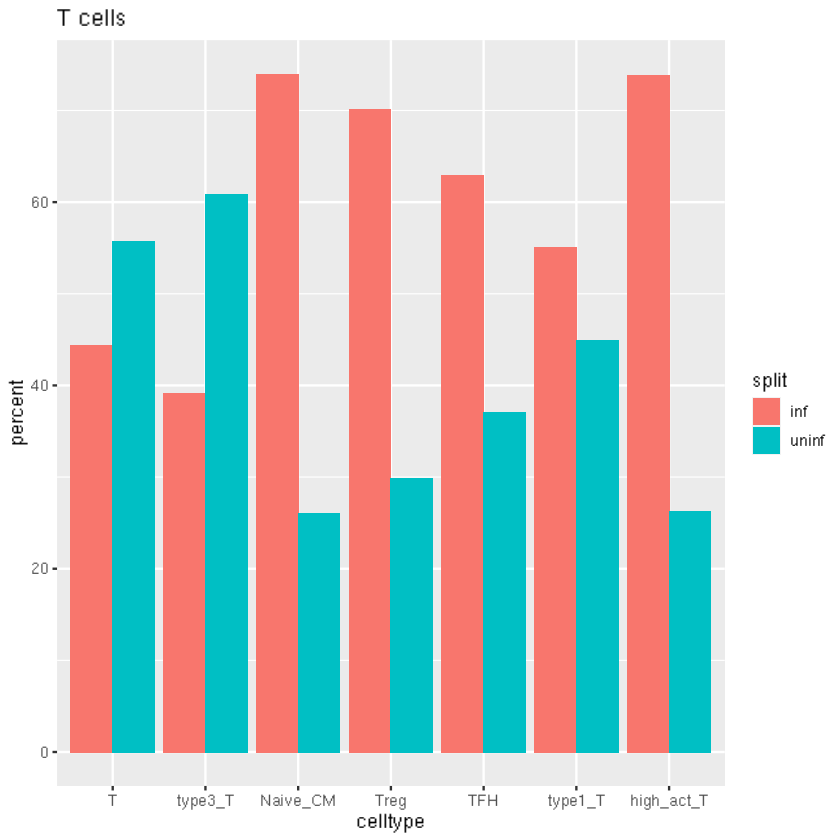

In [15]:
t@meta.data %>%
  group_by(celltype, split) %>%
  count() %>%
  group_by(celltype) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup() %>%
  ggplot(aes(x=celltype, y=percent, fill=split)) +
  geom_col(position = 'dodge') +
  ggtitle("T cells")

### comparison between inf and uninf tissues by patient

In [16]:
a <- t@meta.data %>%
  filter(split == 'inf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
b <- t@meta.data %>%
  filter(split == 'uninf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()

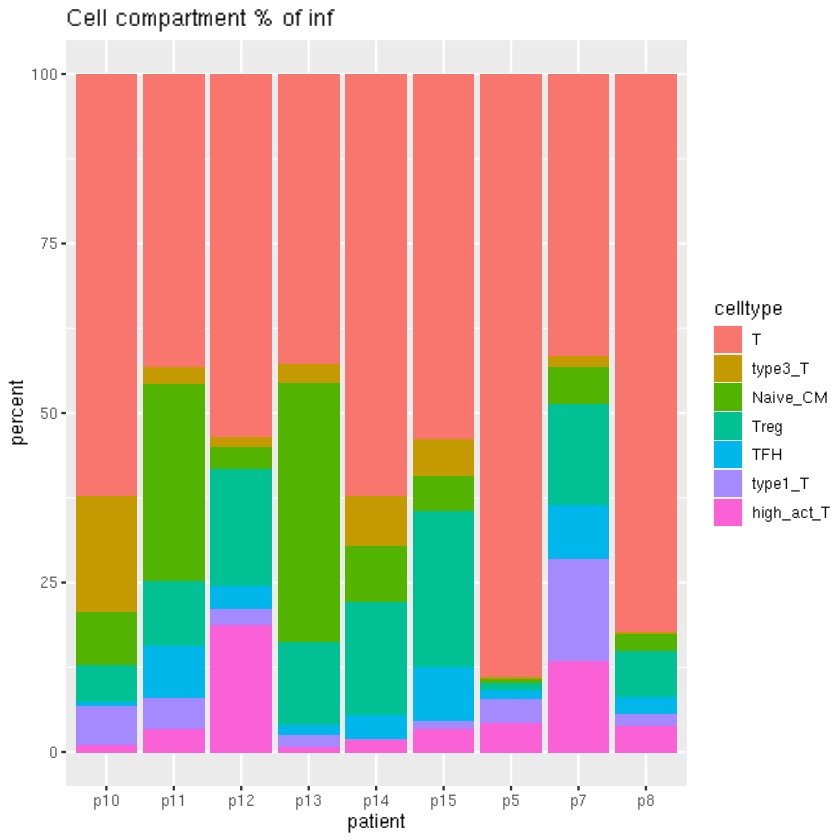

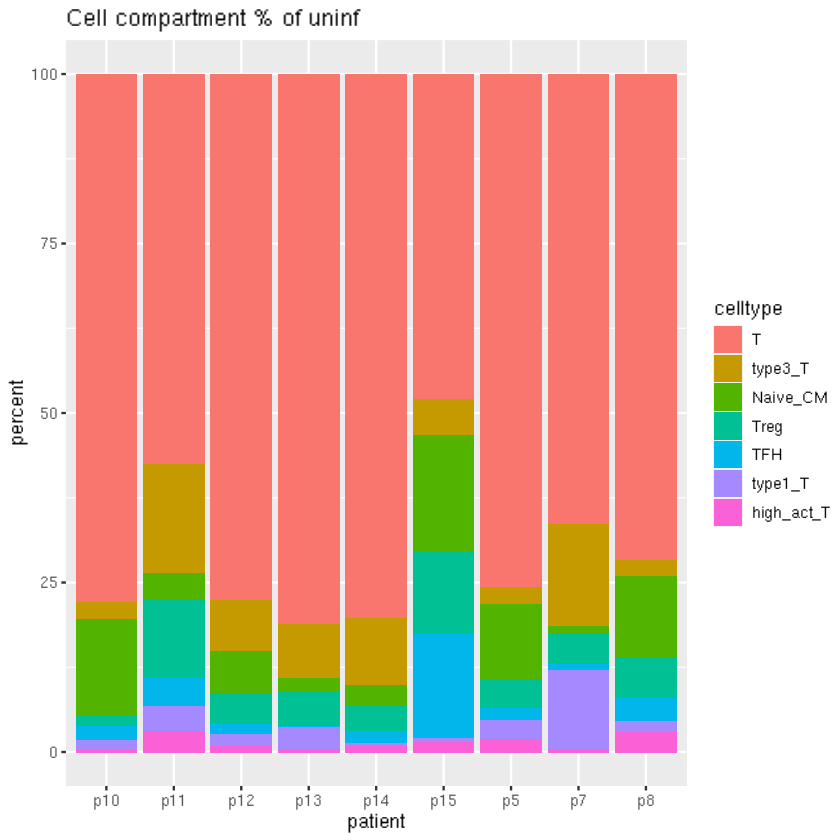

In [17]:
ggplot(a, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of inf")
ggplot(b, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of uninf")

In [26]:
saveRDS(t, file = "./t_cluster_name.rds")

In [38]:
high_act_T <- subset(t, idents = "high_act_T")
high_act_T@meta.data
saveRDS(high_act_T, file = "./high_act_T.rds")

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ep,percent.he,split,patient,integrated_snn_res.1.1,seurat_clusters,celltype,integrated_snn_res.0.5
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
inf_GSE134809_69_AACGGTTGCCTAAG-1,GSE134809_69,2499,1046,2.0008003,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_AACTGTCTAGGTTC-1,GSE134809_69,6460,1827,1.6253870,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_AAGCAAGACTGATG-1,GSE134809_69,1055,413,0.1895735,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_ACCTCCGACCCACT-1,GSE134809_69,5424,1759,2.7839233,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_ACGAGTACAAGGTA-1,GSE134809_69,3065,1180,1.3376835,0.00000000,0.03262643,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_ACGCAATGTGACCA-1,GSE134809_69,12907,2681,2.1461223,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_ACTCTATGTTTGCT-1,GSE134809_69,3447,1233,1.3925152,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_AGGCTAACCTGATG-1,GSE134809_69,2039,887,2.5502697,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
inf_GSE134809_69_AGTAAGGAGGGATG-1,GSE134809_69,2841,1197,1.3023583,0.00000000,0.00000000,inf,p5,20,10,high_act_T,10
